In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.optim import Adam
from konlpy.tag import Okt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from soyspacing.countbase import CountSpace

In [95]:
file_path = '/Users/choedohyeon/desktop/workarea/summery/webtoon.csv'
model = CountSpace()
okt = Okt()

df = pd.read_csv(file_path)
df = df[['title', 'outline']]
df = df.drop_duplicates(subset=['title'])
df = df.drop_duplicates(subset=['outline'])
df['outline'] = df['outline'].str.replace(pat=r"[^\w\s]", repl=r'', regex=True)
df['outline'] = df['outline'].str.replace(pat=r"[\r]", repl=r'', regex=True)
df['outline'] = df['outline'].str.replace(pat=r"[\n]", repl=r' ', regex=True)
df = df.dropna()
df = df.reset_index(drop=True)

outlines = df['outline'].tolist()

corrected_outlines = [model.correct(outline)[0] for outline in outlines if outline != '1' and outline is not None]

df['outline'] = corrected_outlines

outlines = []
for outline in df['outline']:
    outlines.extend(okt.morphs(outline))

print(df)

/var/folders/j0/p8q34w_j4yz0ghqcplk17s240000gn/T/ipykernel_22306/1850026435.py:5: DtypeWarning: Columns (6,7,10,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                title                                            outline
0        회장님의 백만가지 대본  교통사고로 머리를 다친 강예성 뇌 손상으로 자신을 소설속 남주로 착각하는 강예성을 ...
1           회사원 K의 비밀  직장생활 5년 차 김대리 그에겐 딱 한가지 남들에게 말하지 못하는 비밀이 있는데 바...
2      황자님, 왜 잘해 주세요?  저 저를 어떻게 하시려는 거예요 강의 신에게 제물로 가는 거다 더러운 천민이라며 괄...
3        환상의 에덴 [개정판]  어떠한 이유로 방랑하고 있는 사형 잇테츠를 데리러 온 승려 야마토 너무나도 불량한 ...
4         화려한 혼활 버스터즈  혼활에서 연전연패 중인 팔방미인 회사원 카쿄인 요리 그리고 그녀의 소꿉친구 겸 혼활...
...               ...                                                ...
21765        060 특수부대  연재기간 20100323 총회차 1047회차 연재매체 머니투데이 바로가기 a hre...
21766        0.1초의 설렘                                긴 사랑과 짧은 설렘에 대한 보고서
21767    0.0MHz  (완결)                       심령현상을 과학적으로 밝히려는 위험한 발상의 사람들
21768          -0.5˚C  아버지의 불륜으로 사랑에 거부감을 보이는 대학생 이수 사랑을 원하여 남자들과의 만남...
21769            #해모나  셀기꾼 SNS 인기스타인 모나 어느날 그녀 앞에 랜선으로만 연애하던 남자친구가 찾아오는데

[21770 rows x 2 columns]


In [87]:
df.drop(21764)
print(df['outline'][21764])

줄거리


In [35]:
outlines = df['outline'].values
words = ' '.join(outlines).split()
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}
word2int

{'수': 1,
 '그': 2,
 '날': 3,
 '위해': 4,
 '된다': 5,
 '한': 6,
 '있는': 7,
 '된': 8,
 '어느': 9,
 '하지만': 10,
 '이': 11,
 '없는': 12,
 '되는데': 13,
 '두': 14,
 '그리고': 15,
 '자신의': 16,
 '같은': 17,
 '이야기': 18,
 '그의': 19,
 '함께': 20,
 '내': 21,
 '그런': 22,
 '되고': 23,
 '있을까': 24,
 '과연': 25,
 '하는': 26,
 '남자': 27,
 '것': 28,
 '있다': 29,
 '다시': 30,
 '다른': 31,
 '모든': 32,
 '것을': 33,
 '내가': 34,
 '그런데': 35,
 '그는': 36,
 '중': 37,
 '그녀의': 38,
 '한다': 39,
 '갑자기': 40,
 '후': 41,
 '더': 42,
 '자신을': 43,
 '건': 44,
 '하고': 45,
 '있었다': 46,
 '앞에': 47,
 '알게': 48,
 '가진': 49,
 '그러던': 50,
 '그러나': 51,
 '안': 52,
 '전': 53,
 '평범한': 54,
 '시작된다': 55,
 '우연히': 56,
 '되어': 57,
 '않는': 58,
 '마음을': 59,
 '점점': 60,
 '그녀는': 61,
 '그를': 62,
 '때문에': 63,
 '나는': 64,
 '할': 65,
 '바로': 66,
 '새로운': 67,
 '눈을': 68,
 '사람은': 69,
 '하게': 70,
 '만난': 71,
 '걸': 72,
 '것은': 73,
 '있던': 74,
 '만다': 75,
 '로맨스': 76,
 '하는데': 77,
 '자신이': 78,
 '시작한다': 79,
 '온': 80,
 '나타난': 81,
 '사람의': 82,
 '채': 83,
 '되는': 84,
 '될': 85,
 '위한': 86,
 '그가': 87,
 '없이': 88,
 '왜': 89,
 '못한': 90,
 '인해': 91,


In [36]:
outlines_enc = [[word2int[word] for word in outline.split()] for outline in tqdm(outlines)]

100%|█████████████████████████████████| 21770/21770 [00:00<00:00, 153885.56it/s]


In [49]:
outlines_enc = [[word2int[word] for word in outline.split()] for outline in tqdm(outlines)]
df['encoded'] = outlines_enc

print(df['encoded'][0])
print(df)

100%|█████████████████████████████████| 21770/21770 [00:00<00:00, 122276.53it/s]

[1307, 1997, 3077, 64465, 11976, 28078, 43, 38923, 18119, 28079, 64466, 144, 38924, 426, 1, 88, 647, 64467, 64468, 38924, 3359, 482, 64469, 201, 64470, 2906, 5980, 18120, 97, 2287, 9010, 13]
                title                                            outline  \
0        회장님의 백만가지 대본  교통사고로 머리를 다친 강예성 뇌 손상으로 자신을 소설속 남주로 착각하는 강예성을 ...   
1           회사원 K의 비밀  직장생활 5년 차 김대리 그에겐 딱 한가지 남들에게 말하지 못하는 비밀이 있는데 바...   
2      황자님, 왜 잘해 주세요?  저 저를 어떻게 하시려는 거예요 강의 신에게 제물로 가는 거다 더러운 천민이라며 괄...   
3        환상의 에덴 [개정판]  어떠한 이유로 방랑하고 있는 사형 잇테츠를 데리러 온 승려 야마토 너무나도 불량한 ...   
4         화려한 혼활 버스터즈  혼활에서 연전연패 중인 팔방미인 회사원 카쿄인 요리 그리고 그녀의 소꿉친구 겸 혼활...   
...               ...                                                ...   
21765        060 특수부대  연재기간 20100323 총회차 1047회차 연재매체 머니투데이 바로가기 a hre...   
21766        0.1초의 설렘                                긴 사랑과 짧은 설렘에 대한 보고서   
21767    0.0MHz  (완결)                       심령현상을 과학적으로 밝히려는 위험한 발상의 사람들   
21768          -0.5˚C  아버지의 불륜으로 사랑에 거부감을 보이는 대학생

리뷰의 최대 길이 : 324
리뷰의 평균 길이 : 37.932705558107486


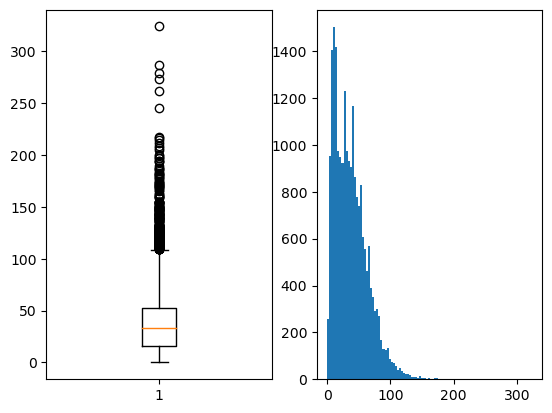

In [54]:
reviews_length = [len(review) for review in df['encoded']]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=100)
plt.show()

In [79]:
def pad_features(outlines, pad_id, seq_length=256):
    features = np.full((len(outlines), seq_length), pad_id, dtype=int)  # np.full((5, 3), 2)

    for i, row in enumerate(outlines):
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

seq_length = 100
features = pad_features(outlines_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)
print(features[0])

[ 1307  1997  3077 64465 11976 28078    43 38923 18119 28079 64466   144
 38924   426     1    88   647 64467 64468 38924  3359   482 64469   201
 64470  2906  5980 18120    97  2287  9010    13     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [82]:
# 데이터를 PyTorch의 DataLoader 형식으로 변환
tensor_data = torch.tensor(features, dtype=torch.long)
dataset = TensorDataset(tensor_data)
dataloader = DataLoader(dataset, batch_size=100, shuffle=False)

# 모델 정의 (예시로 간단한 LSTM 모델 사용)
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# 모델 초기화 및 학습
vocab_size = len(word2int) + 1
embed_size = 128
hidden_size = 128
output_size = vocab_size

model = LSTMModel(vocab_size, embed_size, hidden_size, output_size)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# 모델 학습
epochs = 10  # 적절한 에폭 수 설정
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in dataloader:
        inputs = batch[0]
        targets = batch[0][:, 1:]  # 타겟은 입력 데이터를 한 칸씩 오른쪽으로 시프트한 값입니다.

        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = outputs[:, :-1, :]
        loss = criterion(outputs.contiguous().view(-1, vocab_size), targets.contiguous().view(-1))
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')





# 학습된 모델을 저장
torch.save(model.state_dict(), 'model.pth')

model = LSTMModel(vocab_size, embed_size, hidden_size, output_size)
model.load_state_dict(torch.load('model.pth'))  # 저장된 모델 불러오기

# 추천 함수 정의
def recommend_similar_plot(target_plot, model, word2int, int2word, max_len):
    target_encoded = [word2int[word] for word in target_plot.split()]
    target_padded = pad_sequence(target_encoded, max_len)
    target_tensor = torch.tensor([target_padded], dtype=torch.long)

    model.eval()
    with torch.no_grad():
        output = model(target_tensor)
    _, predicted = torch.topk(output, 3, dim=1)

    recommended_plots = [int2word[idx.item()] for idx in predicted[0]]
    return recommended_plots

# 유사한 줄거리 찾기
target_plot = "직장에서의 이야기를 그린 작품입니다."
recommended_plots = recommend_similar_plot(target_plot, model, word2int, int2word, max_len)
print("입력한 줄거리:", target_plot)
print("유사한 줄거리 추천:")
for plot in recommended_plots:
    print(plot)


IndexError: too many indices for tensor of dimension 2

빈도수 상위 1등 단어 : 100만
